In [65]:
#MNIST digit recognition, classification problem
# Classifying image of hand written digits into numbers 0-9

In [66]:
# Data Loader, Data Transforms, Batches
# Design the model (input size, output size, hidden layers, forward)
#       Multi layer neural network, hidden layer activation function, final layer activation function
#       loss function, optimiser
# Training Loop (batch training)
#       Forward Pass
#       Backward Pass
#       Update weights
# Model Evaluation
#       Test Accuracy
# Plots
#       Accuracy history, Loss history

#### Imports


In [67]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset

import numpy as np
import matplotlib.pyplot as plt

#### Device configuration

In [68]:
torch.cuda.is_available()

True

In [69]:
#device configuration
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

#### Hyperparameters

In [70]:
#### Hyperparameters
input_size = 784 #28 x 28 images
hidden_size1 = 500
hidden_size2 = 124
num_classes = 10 #number of output classes
num_epochs = 20
batch_size = 100
learning_rate = 0.001

# The following model performed very poorly
# #### Hyperparameters
# input_size = 784 #28 x 28 images
# hidden_size1 = 124
# hidden_size2 = 64
# num_classes = 10 #number of output classes
# num_epochs = 20
# batch_size = 100
# learning_rate = 0.001

#### Dataset

In [71]:
train_dst = torchvision.datasets.MNIST(root='/data',train=True,transform=transforms.ToTensor(),download=True)
test_dst = torchvision.datasets.MNIST(root='/data',train=False,transform=transforms.ToTensor())

In [72]:
train_loader = DataLoader(dataset=train_dst,batch_size=batch_size,shuffle=True)
test_loader = DataLoader(dataset=test_dst,batch_size=batch_size)

##### Have a look at first batch of data

In [73]:
dataiter = iter(train_loader)
batch_data = dataiter.next()

In [74]:
inputs,labels = batch_data

In [75]:
len(batch_data)

2

In [76]:
inputs.shape

torch.Size([100, 1, 28, 28])

In [77]:
labels.shape

torch.Size([100])

###### Visualise Images

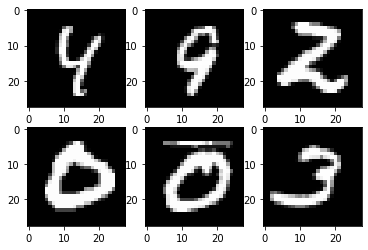

In [78]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(inputs[i][0],cmap='gray') #accessing the first channel
plt.show()

In [79]:
class MNIST_data(Dataset):
    def __init__(self):
        #

        mnist_dst = torchvision.datasets.MNIST(root='/data',train=true)
    def __get_item__(self,index):
        #
        8
    def __len__(self):
        #
        8

#### Design the Model

##### Neural Network Class

In [80]:
class NeuralNet_HW(nn.Module):
    def __init__(self,input_features,hidden_size1,hidden_size2,output_features):
        super(NeuralNet_HW,self).__init__()
        self.lin1 = nn.Linear(input_features,hidden_size1)
        self.relu = nn.ReLU()
        self.lin2 = nn.Linear(hidden_size1,hidden_size2)
        self.lin3 = nn.Linear(hidden_size2,output_features) 
        self.softmax = nn.Softmax() #remove this if we are using cross entropy loss
    def forward(self,x):
        out = self.lin1(x)
        out = self.relu(out)
        out = self.lin2(out)
        out = self.relu(out)
        out = self.lin3(out)
        return out
        #out = self.softmax(out) we dont apply this, as we are using cross entropy loss, it applies softmax for as

In [81]:
model = NeuralNet_HW(input_size,hidden_size1,hidden_size2,num_classes).to(device)

In [82]:
 # model.summary()  check this out later

In [83]:
model

NeuralNet_HW(
  (lin1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (lin2): Linear(in_features=500, out_features=124, bias=True)
  (lin3): Linear(in_features=124, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)

##### Loss Function and Optimiser

In [84]:
loss_func = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(),lr=learning_rate)

#### Training Loop

In [85]:
num_steps_per_epoch = len(train_loader)

for epoch in range(num_epochs) : #looping over epochs
    for i,(inputs,labels) in enumerate(train_loader): #looping over batches

        #Flatten the images

        #inputs have shape 100,1,28,28, we need to change this to 100,784 
        inputs = inputs.view(-1,28*28).to(device) #copy the to gpu, as we do training on the gpu 
        labels = labels.to(device)

        #forward pass
        y_preds = model(inputs)
        # print(y_preds.shape), should be n_samples x n_classes
        loss = loss_func(y_preds,labels)

        #backward pass
        optimiser.zero_grad()
        loss.backward()

        #weight updation
        optimiser.step()

        if (i+1)%200 == 0:
            print(f"epoch {epoch+1} / {num_epochs}, step {i+1} / {num_steps_per_epoch}, loss = {loss.item():.4f}")
        
        

epoch 1 / 20, step 200 / 600, loss = 0.1657
epoch 1 / 20, step 400 / 600, loss = 0.2221
epoch 1 / 20, step 600 / 600, loss = 0.0582
epoch 2 / 20, step 200 / 600, loss = 0.1392
epoch 2 / 20, step 400 / 600, loss = 0.1473
epoch 2 / 20, step 600 / 600, loss = 0.0286
epoch 3 / 20, step 200 / 600, loss = 0.0664
epoch 3 / 20, step 400 / 600, loss = 0.0846
epoch 3 / 20, step 600 / 600, loss = 0.0485
epoch 4 / 20, step 200 / 600, loss = 0.0093
epoch 4 / 20, step 400 / 600, loss = 0.0427
epoch 4 / 20, step 600 / 600, loss = 0.0347
epoch 5 / 20, step 200 / 600, loss = 0.0221
epoch 5 / 20, step 400 / 600, loss = 0.0053
epoch 5 / 20, step 600 / 600, loss = 0.0184
epoch 6 / 20, step 200 / 600, loss = 0.0684
epoch 6 / 20, step 400 / 600, loss = 0.0675
epoch 6 / 20, step 600 / 600, loss = 0.0211
epoch 7 / 20, step 200 / 600, loss = 0.0387
epoch 7 / 20, step 400 / 600, loss = 0.0297
epoch 7 / 20, step 600 / 600, loss = 0.0257
epoch 8 / 20, step 200 / 600, loss = 0.0242
epoch 8 / 20, step 400 / 600, lo

#### Model Evaluation

##### Test Accuracy

In [86]:
with torch.no_grad():
    correct_pred = 0
    n_samples = 0
    for i,(inputs,labels) in enumerate(test_loader):
        inputs = inputs.view(-1,28*28).to(device) #copy to gpu
        labels = labels.to(device)

        outputs = model(inputs)

        _,preds = torch.max(outputs,1) #returns value snad index, inndex is the class label

        n_samples += inputs.shape[0]
        correct_pred += torch.eq(labels,preds).sum().item()
        
    accuracy = (100.0*correct_pred)/n_samples
    print(f"Test accuracy of the model = {accuracy:.2f}%")

Test accuracy of the model = 98.10%


In [87]:
with torch.no_grad():
    correct_pred = 0
    n_samples = 0
    for i,(inputs,labels) in enumerate(train_loader):
        inputs = inputs.view(-1,28*28).to(device) #copy to gpu
        labels = labels.to(device)

        outputs = model(inputs)

        _,preds = torch.max(outputs,1) #returns value snad index, inndex is the class label

        n_samples += inputs.shape[0]
        correct_pred += torch.eq(labels,preds).sum().item()
        
    accuracy = (100.0*correct_pred)/n_samples
    print(f"Test accuracy of the model = {accuracy:.2f}%")

Test accuracy of the model = 99.81%
